<a href="https://colab.research.google.com/github/nottarun7/Solar-Power-Prediction-using-ANN/blob/main/Solar_power_forecasting_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [25]:
data = pd.read_csv('./solarpower_generation_new.csv')
data.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw,timestamp
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095,2024-01-01 00:00:00
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940,2024-01-01 03:00:00
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930,2024-01-01 06:00:00
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920,2024-01-01 09:00:00
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340,2024-01-01 12:00:00


In [28]:
# Convert the 'power-generated' column from joules to kilowatts (1 kW = 1000 J)
data['generated_power_kw'] = data['generated_power_kw'] / 1000  # Converting to kW

In [30]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

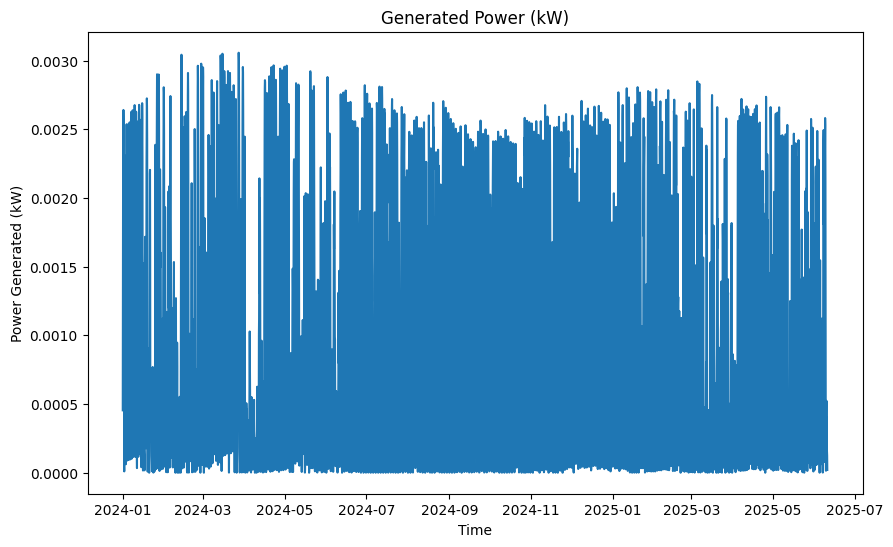

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(data['generated_power_kw'])
plt.title('Generated Power (kW)')
plt.xlabel('Time')
plt.ylabel('Power Generated (kW)')
plt.show()

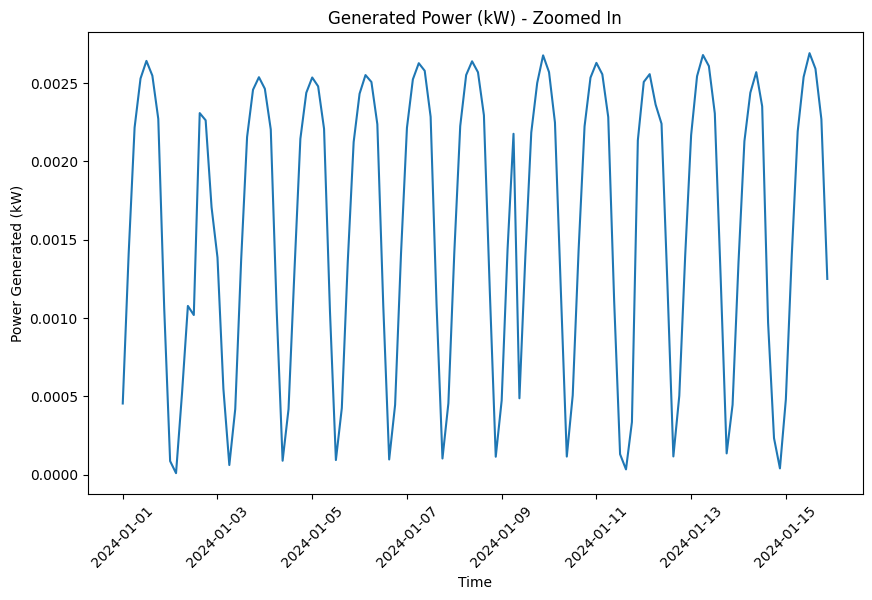

In [32]:
# Filter data for a specific time range
start_date = '2024-01-01'
end_date = '2024-01-15'
filtered_data = data.loc[start_date:end_date]

plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['generated_power_kw'])
plt.title('Generated Power (kW) - Zoomed In')
plt.xlabel('Time')
plt.ylabel('Power Generated (kW)')
plt.xticks(rotation=45)
plt.show()


In [34]:
train, test = train_test_split(data['generated_power_kw'], test_size=0.2, shuffle=False)

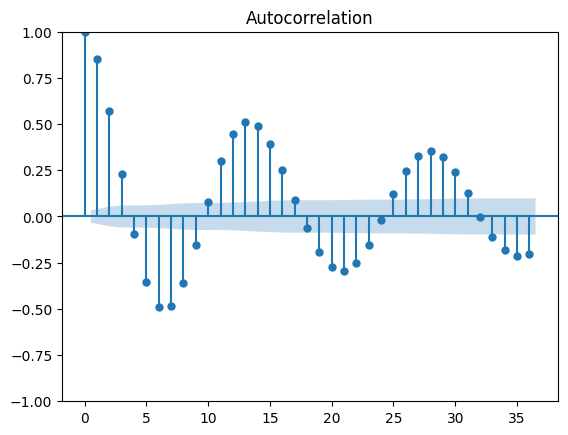

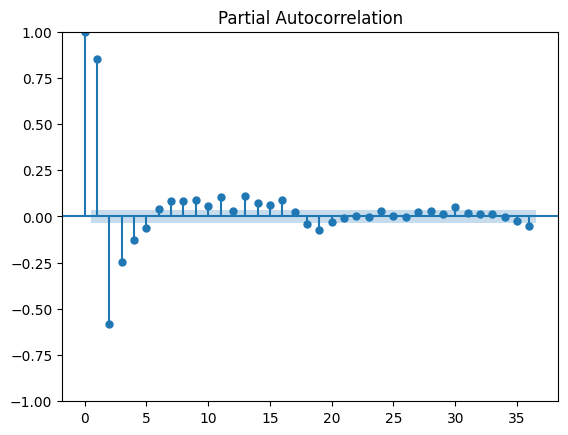

In [35]:
plot_acf(train)
plot_pacf(train)
plt.show()

In [36]:
model = ARIMA(train, order=(1, 1, 1))
fitted_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 3h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 3h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 3h will be used.
  self._init_dates(dates, freq)


In [37]:
forecast = fitted_model.forecast(steps=len(test))


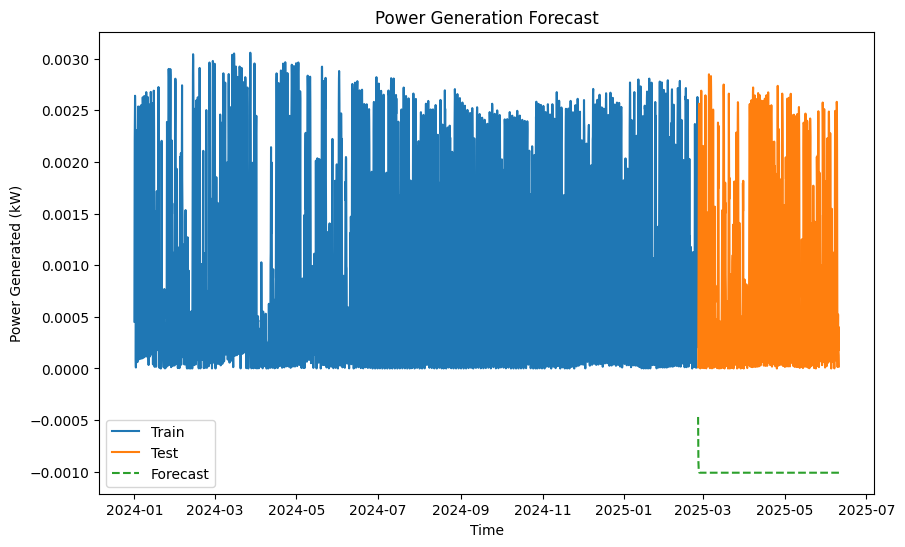

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title('Power Generation Forecast')
plt.xlabel('Time')
plt.ylabel('Power Generated (kW)')
plt.legend()
plt.show()

In [39]:
# Calculate model accuracy (Mean Squared Error)
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4.908759836340017e-06


1. Zoomed-In Plot of Forecast vs Actual Values:
This graph will focus on a smaller time window to zoom into the forecast and actual values, showing more detail in how well the model captures the trend.

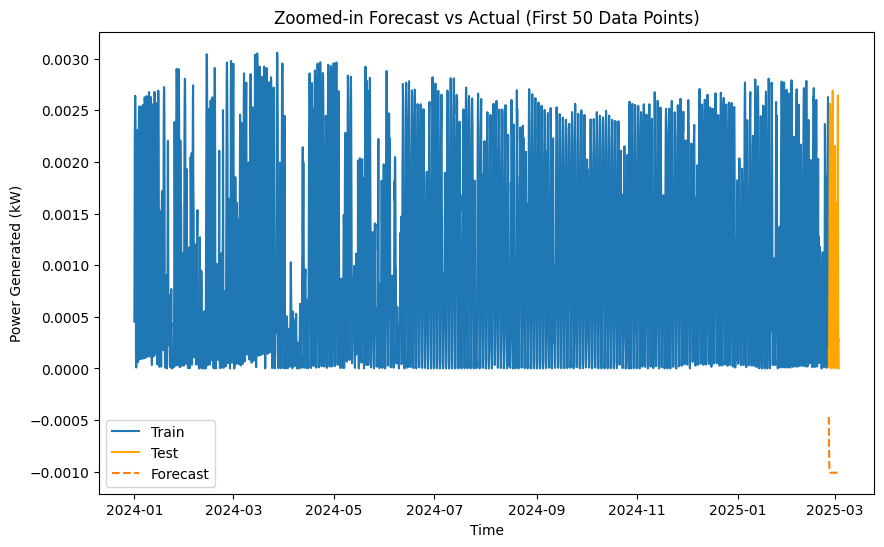

In [40]:
# Zoomed-in plot (e.g., the first 50 data points in the test set)
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index[:50], test[:50], label='Test', color='orange')
plt.plot(test.index[:50], forecast[:50], label='Forecast', linestyle='--')
plt.title('Zoomed-in Forecast vs Actual (First 50 Data Points)')
plt.xlabel('Time')
plt.ylabel('Power Generated (kW)')
plt.legend()
plt.show()

2. Plot the Residuals (Error Analysis):
The residuals are the differences between the observed (actual) and predicted values. Plotting the residuals is crucial to check for any remaining patterns, indicating model misfit.

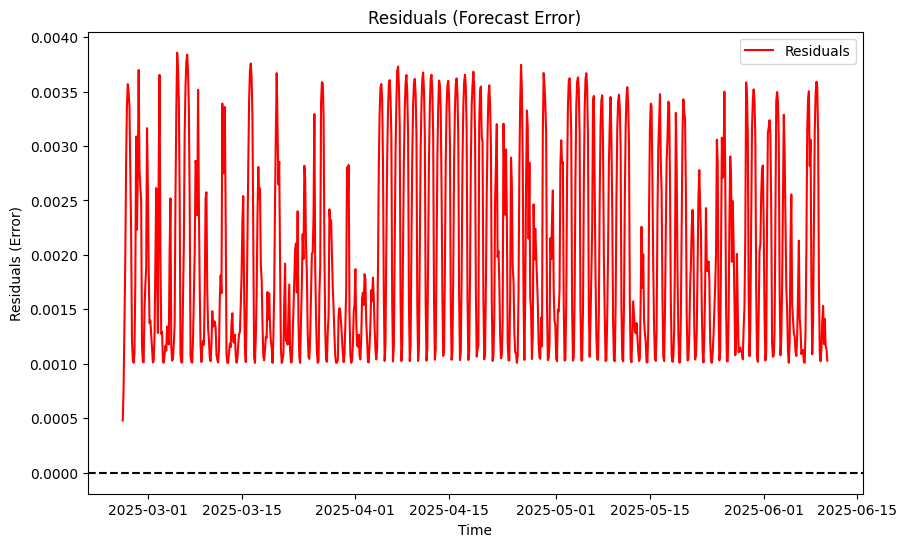

In [41]:
# Calculate residuals
residuals = test - forecast

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(test.index, residuals, label='Residuals', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals (Forecast Error)')
plt.xlabel('Time')
plt.ylabel('Residuals (Error)')
plt.legend()
plt.show()

3. Histogram of the Residuals:
A histogram of residuals helps assess the distribution of the errors. Ideally, residuals should be normally distributed (mean ~0) if the model fits well.

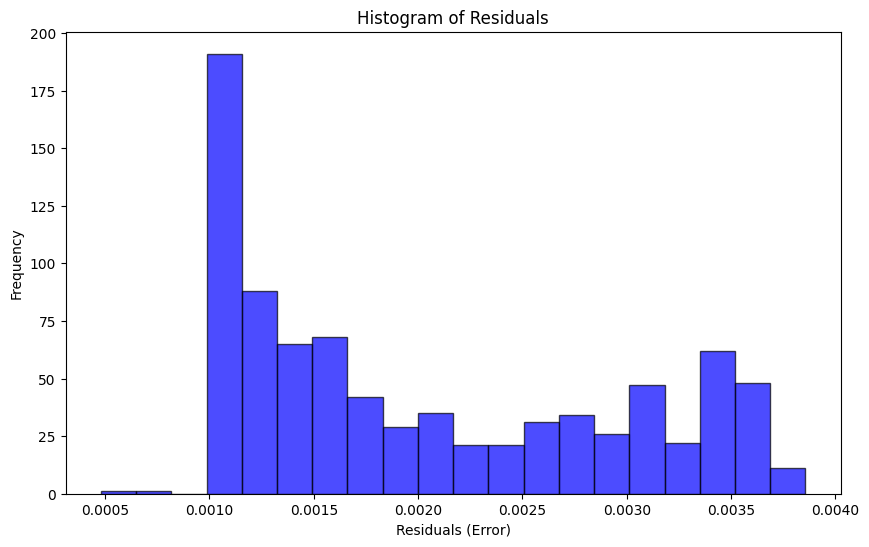

In [42]:
# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='black', color='blue', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals (Error)')
plt.ylabel('Frequency')
plt.show()

4. Plot the Cumulative Forecast Error:

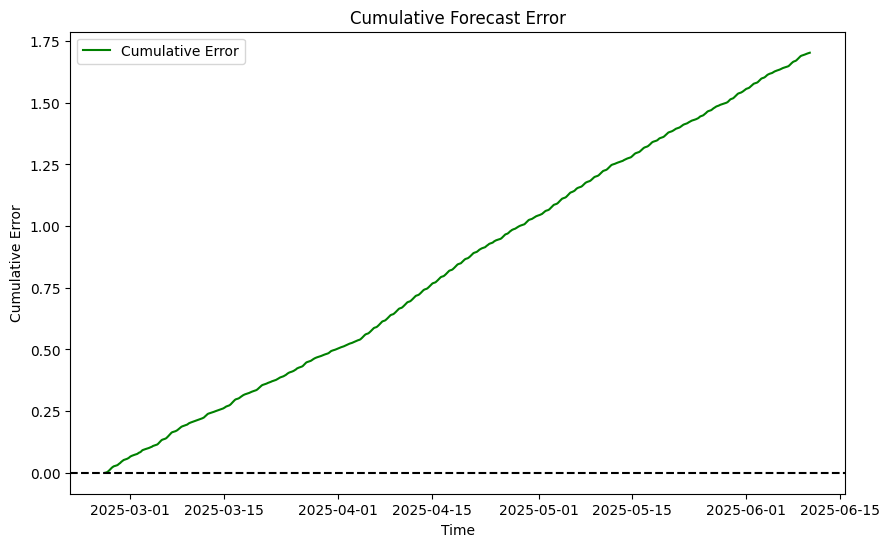

In [43]:
# Cumulative sum of residuals
cumulative_error = residuals.cumsum()

# Plot cumulative error
plt.figure(figsize=(10, 6))
plt.plot(test.index, cumulative_error, label='Cumulative Error', color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Cumulative Forecast Error')
plt.xlabel('Time')
plt.ylabel('Cumulative Error')
plt.legend()
plt.show()

Explanation: The cumulative error plot shows how errors accumulate over time. Ideally, it should oscillate around zero with no systematic trend, indicating no consistent over- or under-prediction.

5. Forecast Error Metrics (e.g., MAE, MSE, RMSE):
Compute and display common forecast error metrics to quantify how well the model is performing in a numerical way. These metrics include:

Mean Absolute Error (MAE): Average of absolute errors.
Mean Squared Error (MSE): Average of squared errors.
Root Mean Squared Error (RMSE): Square root of the MSE.

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate error metrics
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

# Display error metrics
print(f"Mean Absolute Error (MAE): {mae:.5f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

Mean Absolute Error (MAE): 0.00202
Root Mean Squared Error (RMSE): 0.00222


6. Rolling Mean and Standard Deviation (for Variance Analysis):
This plot can help visualize how stable the error is over time. If the model’s error shows large variations, you may need to adjust it.

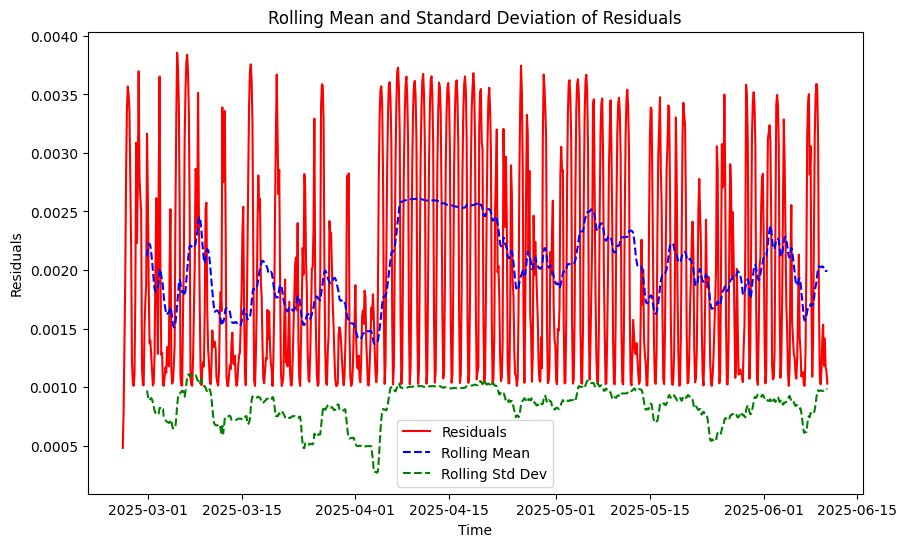

In [47]:
# Rolling mean and rolling std deviation of the residuals
rolling_mean = residuals.rolling(window=30).mean()  # 30-period rolling mean
rolling_std = residuals.rolling(window=30).std()    # 30-period rolling std deviation

# Plot rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(test.index, residuals, label='Residuals', color='red')
plt.plot(test.index, rolling_mean, label='Rolling Mean', color='blue', linestyle='--')
plt.plot(test.index, rolling_std, label='Rolling Std Dev', color='green', linestyle='--')
plt.title('Rolling Mean and Standard Deviation of Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()


Explanation: The rolling mean and standard deviation help show the stability of the residuals over time. If the rolling standard deviation varies widely, it indicates periods of high variance in the forecast errors, which could suggest that the model’s performance changes over time.
